A tree is an undirected graph in which any two vertices are connected by exactly one path. In other words, any connected graph without simple cycles is a tree.

Given a tree of n nodes labelled from 0 to n - 1, and an array of n - 1 edges where edges[i] = [ai, bi] indicates that there is an undirected edge between the two nodes ai and bi in the tree, you can choose any node of the tree as the root. When you select a node x as the root, the result tree has height h. Among all possible rooted trees, those with minimum height (i.e. min(h))  are called minimum height trees (MHTs).

Return a list of all MHTs' root labels. You can return the answer in any order.

The height of a rooted tree is the number of edges on the longest downward path between the root and a leaf.

 

Example 1:

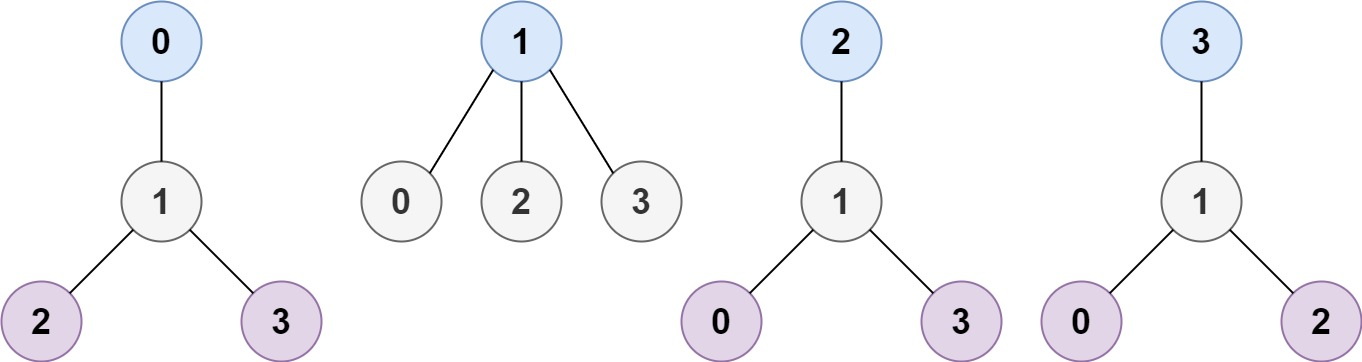

Input: n = 4, edges = [[1,0],[1,2],[1,3]]
Output: [1]
Explanation: As shown, the height of the tree is 1 when the root is the node with label 1 which is the only MHT.

Example 2:

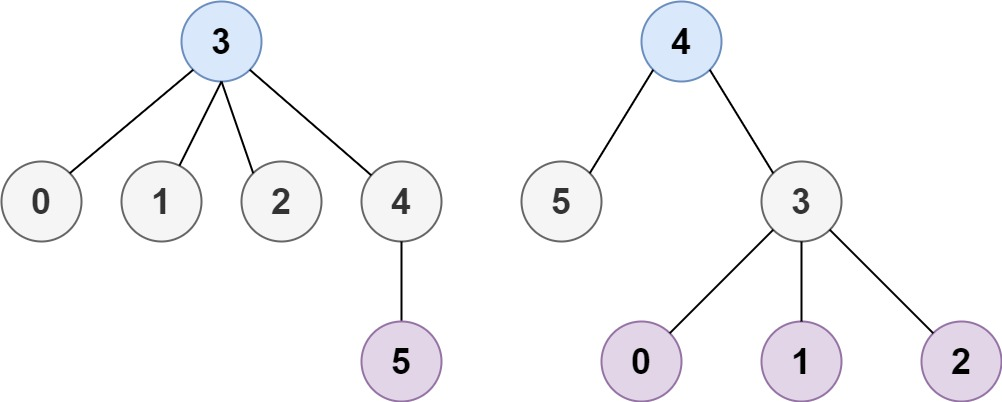

Input: n = 6, edges = [[3,0],[3,1],[3,2],[3,4],[5,4]]
Output: [3,4]

 

Constraints:

    1 <= n <= 2 * 104
    edges.length == n - 1
    0 <= ai, bi < n
    ai != bi
    All the pairs (ai, bi) are distinct.
    The given input is guaranteed to be a tree and there will be no repeated edges.



In [ ]:
class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        counts = [0] * n
        links = [0] * n
        
        for edge in edges:
            links[edge[0]] ^= edge[1]
            counts[edge[0]] += 1
            links[edge[1]] ^= edge[0]
            counts[edge[1]] += 1
        
        Qu = deque()
        dists = [0] * n
        
        for i in range(n):
            if counts[i] == 1:
                Qu.append(i)
        
        stp = 1
        while Qu:
            size = len(Qu)
            for _ in range(size):
                tmp = Qu.popleft()
                links[links[tmp]] ^= tmp
                counts[links[tmp]] -= 1
                if counts[links[tmp]] == 1:
                    dists[links[tmp]] = max(stp, dists[links[tmp]])
                    Qu.append(links[tmp])
            stp += 1
        
        max_dist = max(dists)
        res = [i for i in range(n) if dists[i] == max_dist]
        
        return res